In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json  

In [22]:
data_folder = "data"

json_files = [f for f in os.listdir(data_folder) if f.endswith(".json")]


for json_file in json_files:
    json_path = os.path.join(data_folder, json_file)
    
    
    with open(json_path, "r") as file:
        data = json.load(file)
    
    forex_data = data.get("Time Series FX (Daily)", {})
    
    df = pd.DataFrame.from_dict(forex_data, orient="index")
    df.index.name = "Date"
    
    df.columns = ["Open", "High", "Low", "Close"]
    df = df.astype(float)
    
    csv_filename = json_file.replace(".json", ".csv")
    csv_path = os.path.join(data_folder, csv_filename)
    
    df.to_csv(csv_path)
    
    print(f"Converted {json_file} to {csv_filename}")

print("All JSON files converted to CSV successfully!")


Converted historical_EUR_EGP.json to historical_EUR_EGP.csv
Converted historical_EUR_USD.json to historical_EUR_USD.csv
Converted historical_USD_EGP.json to historical_USD_EGP.csv
All JSON files converted to CSV successfully!


# test Viz

In [23]:
data_folder = "data"
usd_egp = pd.read_csv(f"{data_folder}/historical_USD_EGP.csv", index_col="Date", parse_dates=True)
eur_egp = pd.read_csv(f"{data_folder}/historical_EUR_EGP.csv", index_col="Date", parse_dates=True)
eur_usd = pd.read_csv(f"{data_folder}/historical_EUR_USD.csv", index_col="Date", parse_dates=True)


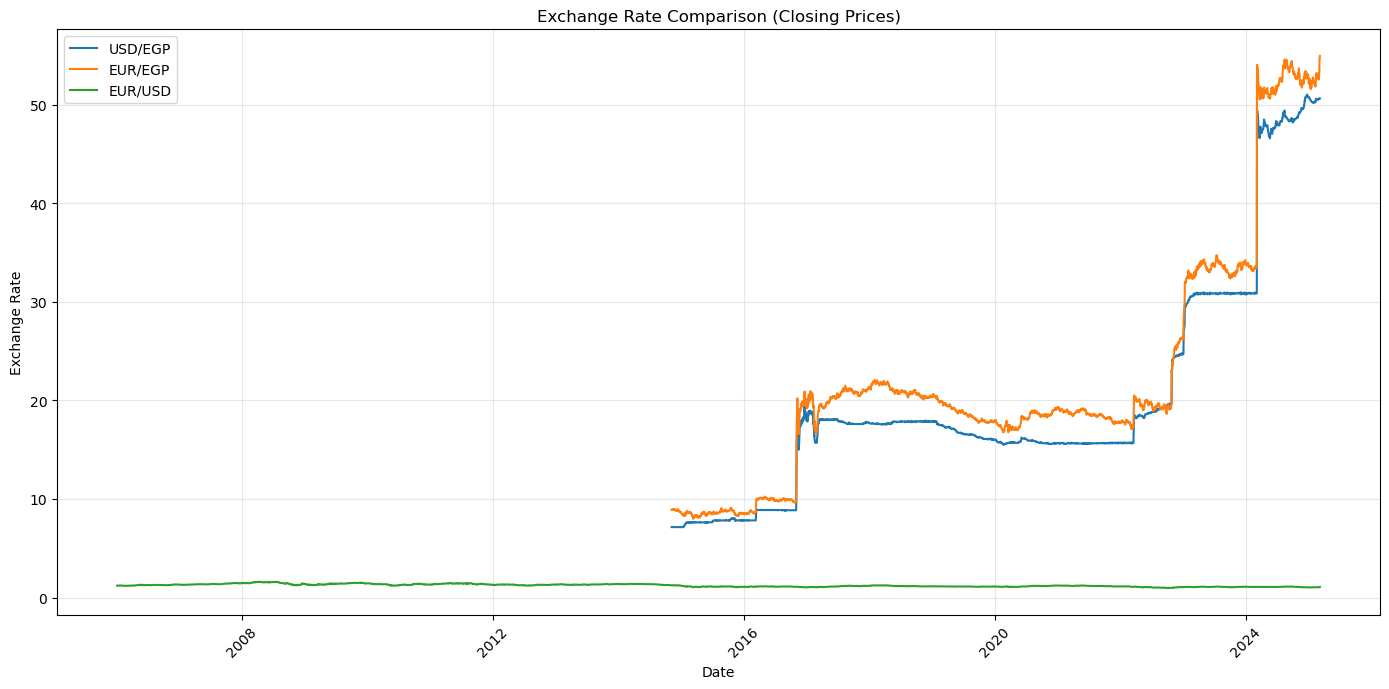

In [24]:
plt.figure(figsize=(14, 7))
plt.plot(usd_egp.index, usd_egp['Close'], label='USD/EGP')
plt.plot(eur_egp.index, eur_egp['Close'], label='EUR/EGP')
plt.plot(eur_usd.index, eur_usd['Close'], label='EUR/USD')
plt.title('Exchange Rate Comparison (Closing Prices)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

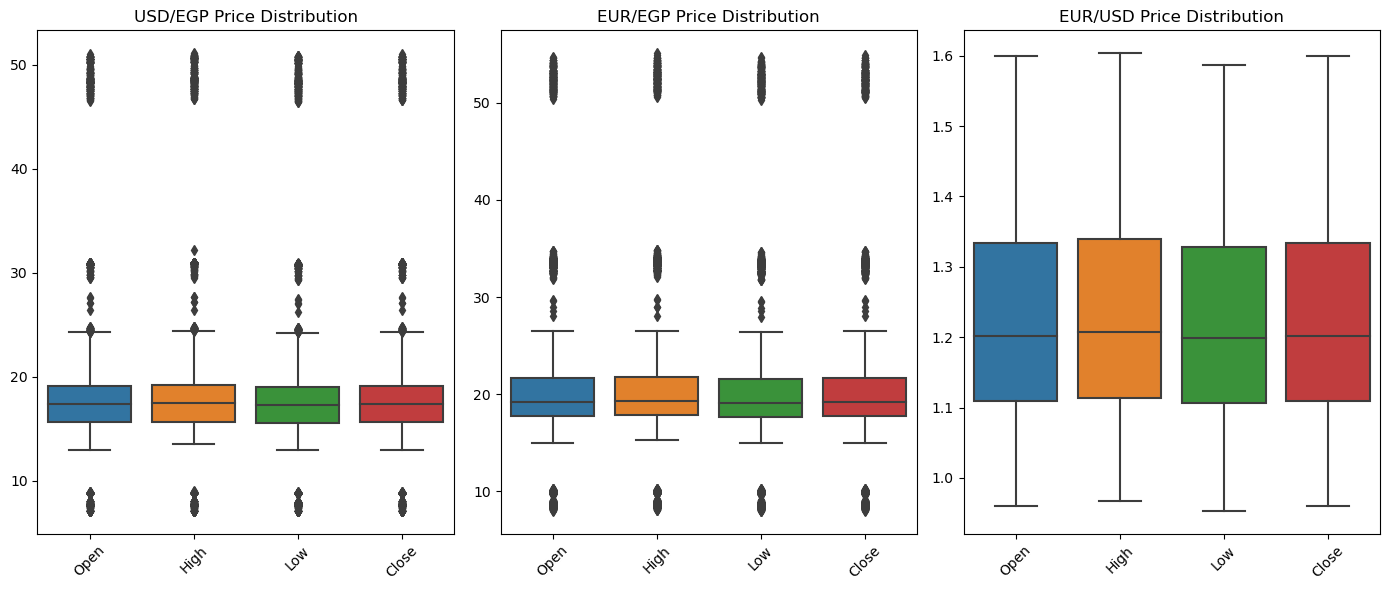

In [27]:
plt.figure(figsize=(14, 6))
for i, data in enumerate([usd_egp, eur_egp, eur_usd], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=data[['Open', 'High', 'Low', 'Close']])
    plt.title(f"{'USD/EGP' if i==1 else 'EUR/EGP' if i==2 else 'EUR/USD'} Price Distribution")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
usd_egp_weekly = usd_egp['Close'].resample('W').mean().reset_index()
eur_egp_weekly = eur_egp['Close'].resample('W').mean().reset_index() 
eur_usd_weekly = eur_usd['Close'].resample('W').mean().reset_index()


fig = px.line(usd_egp_weekly, x='Date', y='Close', title='USD/EGP Weekly Average Exchange Rate')
fig.show()

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=usd_egp_weekly['Date'], y=usd_egp_weekly['Close'], mode='lines', name='USD/EGP'))
fig.add_trace(go.Scatter(x=eur_egp_weekly['Date'], y=eur_egp_weekly['Close'], mode='lines', name='EUR/EGP'))
fig.add_trace(go.Scatter(x=eur_usd_weekly['Date'], y=eur_usd_weekly['Close'], mode='lines', name='EUR/USD'))

fig.update_layout(
    title='Weekly Average Exchange Rates',
    xaxis_title='Date',
    yaxis_title='Exchange Rate',
    legend_title='Currency Pairs',
    template='plotly_white'
)
fig.show()

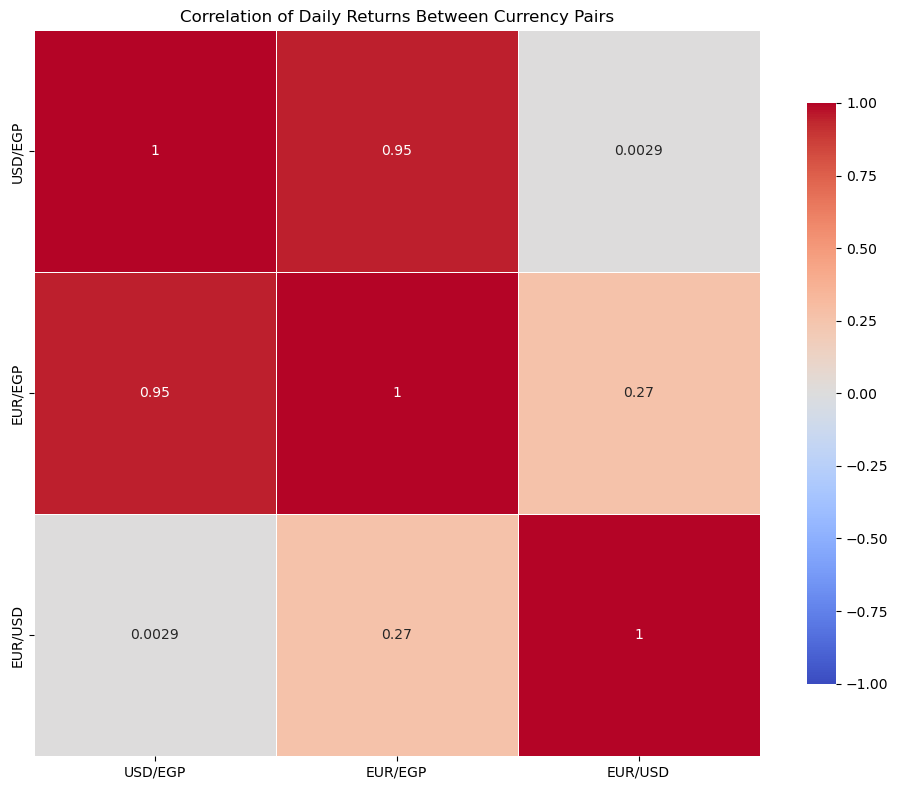

In [30]:
combined_df = pd.DataFrame({
    'USD/EGP': usd_egp['Close'],
    'EUR/EGP': eur_egp['Close'],
    'EUR/USD': eur_usd['Close']
})


returns = combined_df.pct_change().dropna()


correlation = returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation of Daily Returns Between Currency Pairs')
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

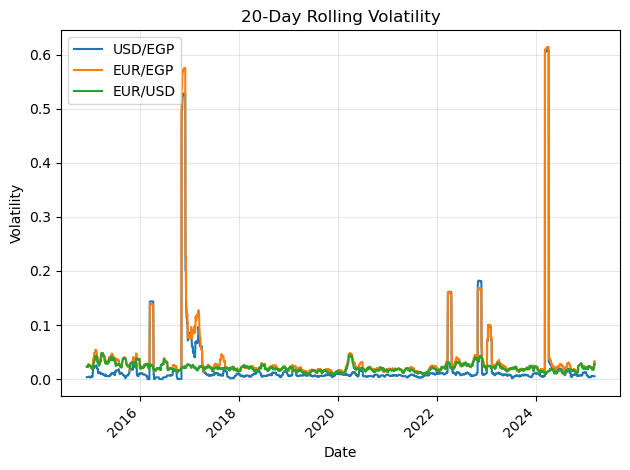

In [31]:
window = 20  # 20-day rolling window
volatility = returns.rolling(window=window).std() * np.sqrt(window)  
plt.figure(figsize=(14, 7))
volatility.plot()
plt.title(f'{window}-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()